In [1]:
from arquivos import central
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import seaborn as sns
from numba import njit
import numpy as np
import pandas as pd
import math
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (40,15)

In [2]:
robot = central.Central()
robot.get_normal_data_csv('C:\\Users\\johnk\\Google Drive\\My_Project\\Dados\\EURUSD_20Y.csv', drop=True, drop_list=['Unnamed: 0'], timeframe='H1',pair='EURUSD')

Dados Carregados com Sucesso.


In [7]:
df = robot.get_normal_data()['H1'].dropna().reset_index(drop=True)
df

0         1.01290
1         1.01400
2         1.01700
3         1.01730
4         1.01710
           ...   
128546    1.21774
128547    1.21642
128548    1.21766
128549    1.21814
128550    1.21857
Name: H1, Length: 128551, dtype: float64

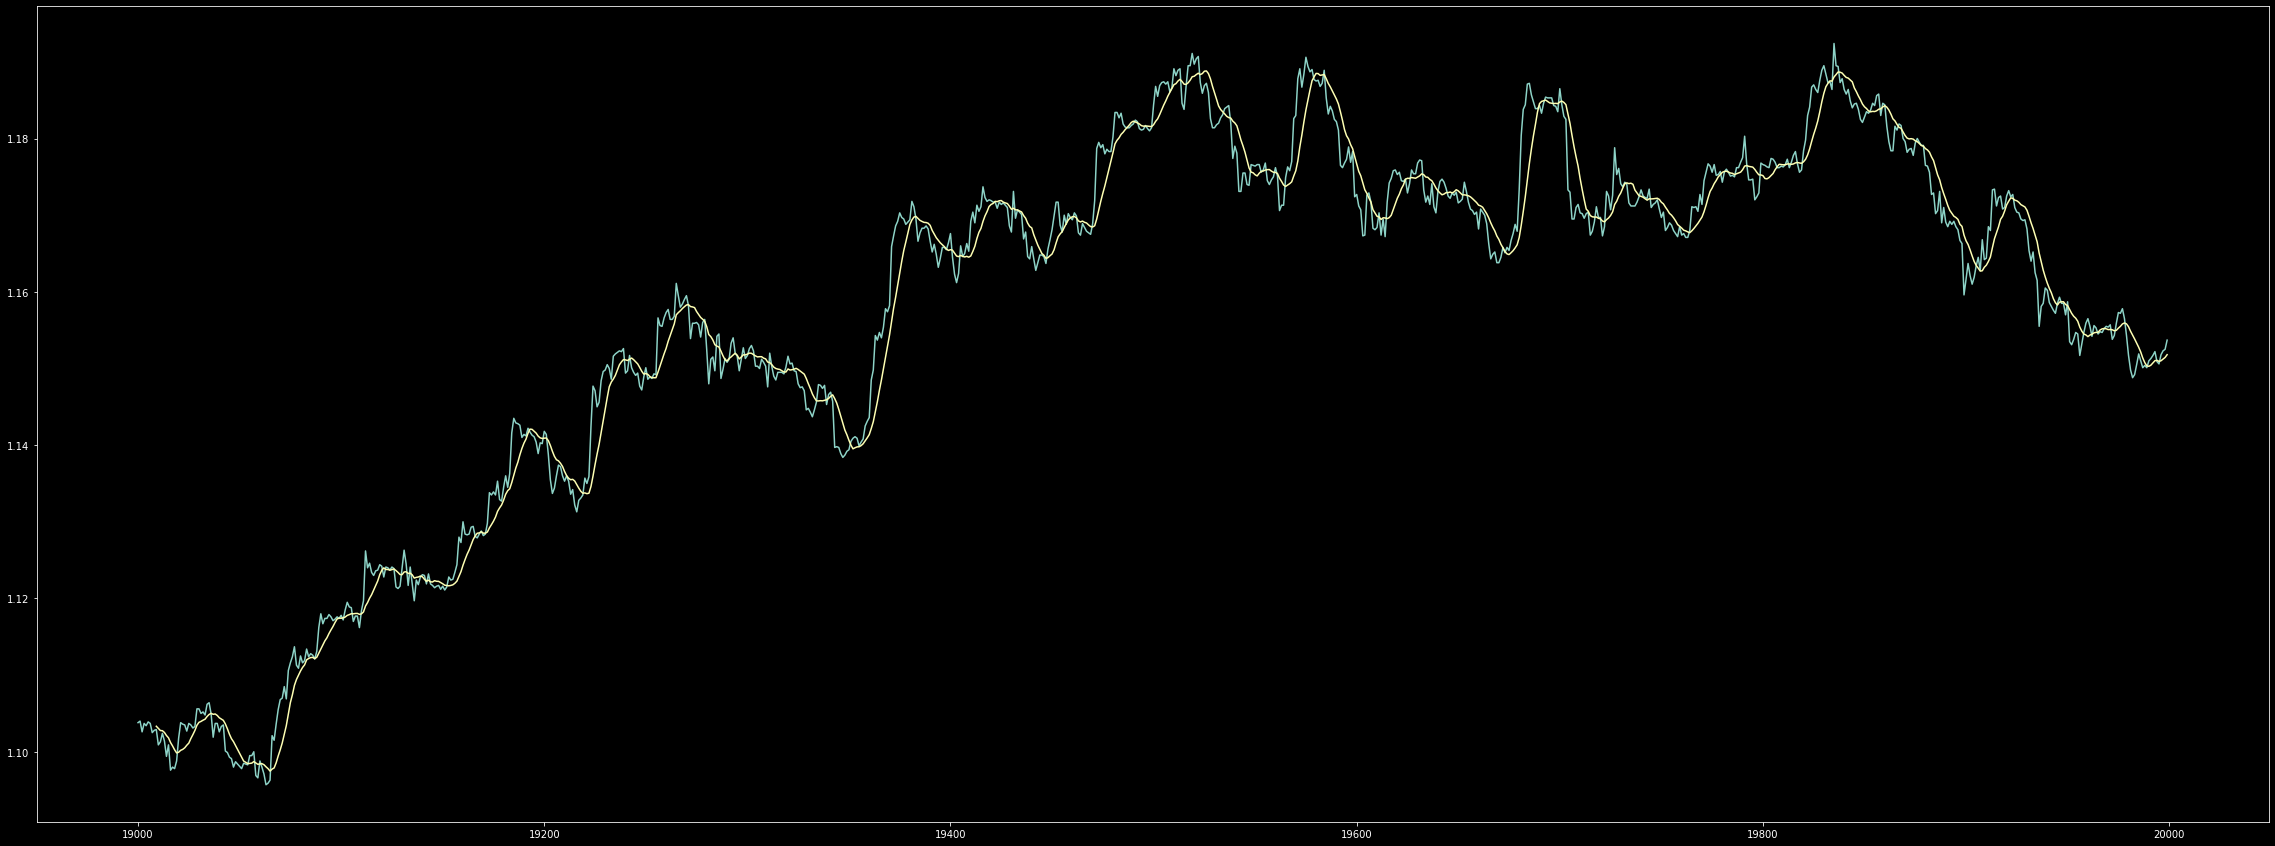

In [13]:
plt.plot(df.iloc[19000:20000])
plt.plot(df.iloc[19000:20000].rolling(10).mean())

In [14]:
x = df.to_numpy()
x

array([1.0129 , 1.014  , 1.017  , ..., 1.21766, 1.21814, 1.21857])

In [49]:
periodo = 10
multi = 3
new_average = np.ones(x.size)
for i in np.arange(x.size):
    if i < periodo*multi:
        continue
    if x[i] > x[i-(j*multi):i].max() or x[i] < x[i-(j*multi):i].min():
        new_average[i] = x[i]
    else:
        new_average[i] = x[i-1]

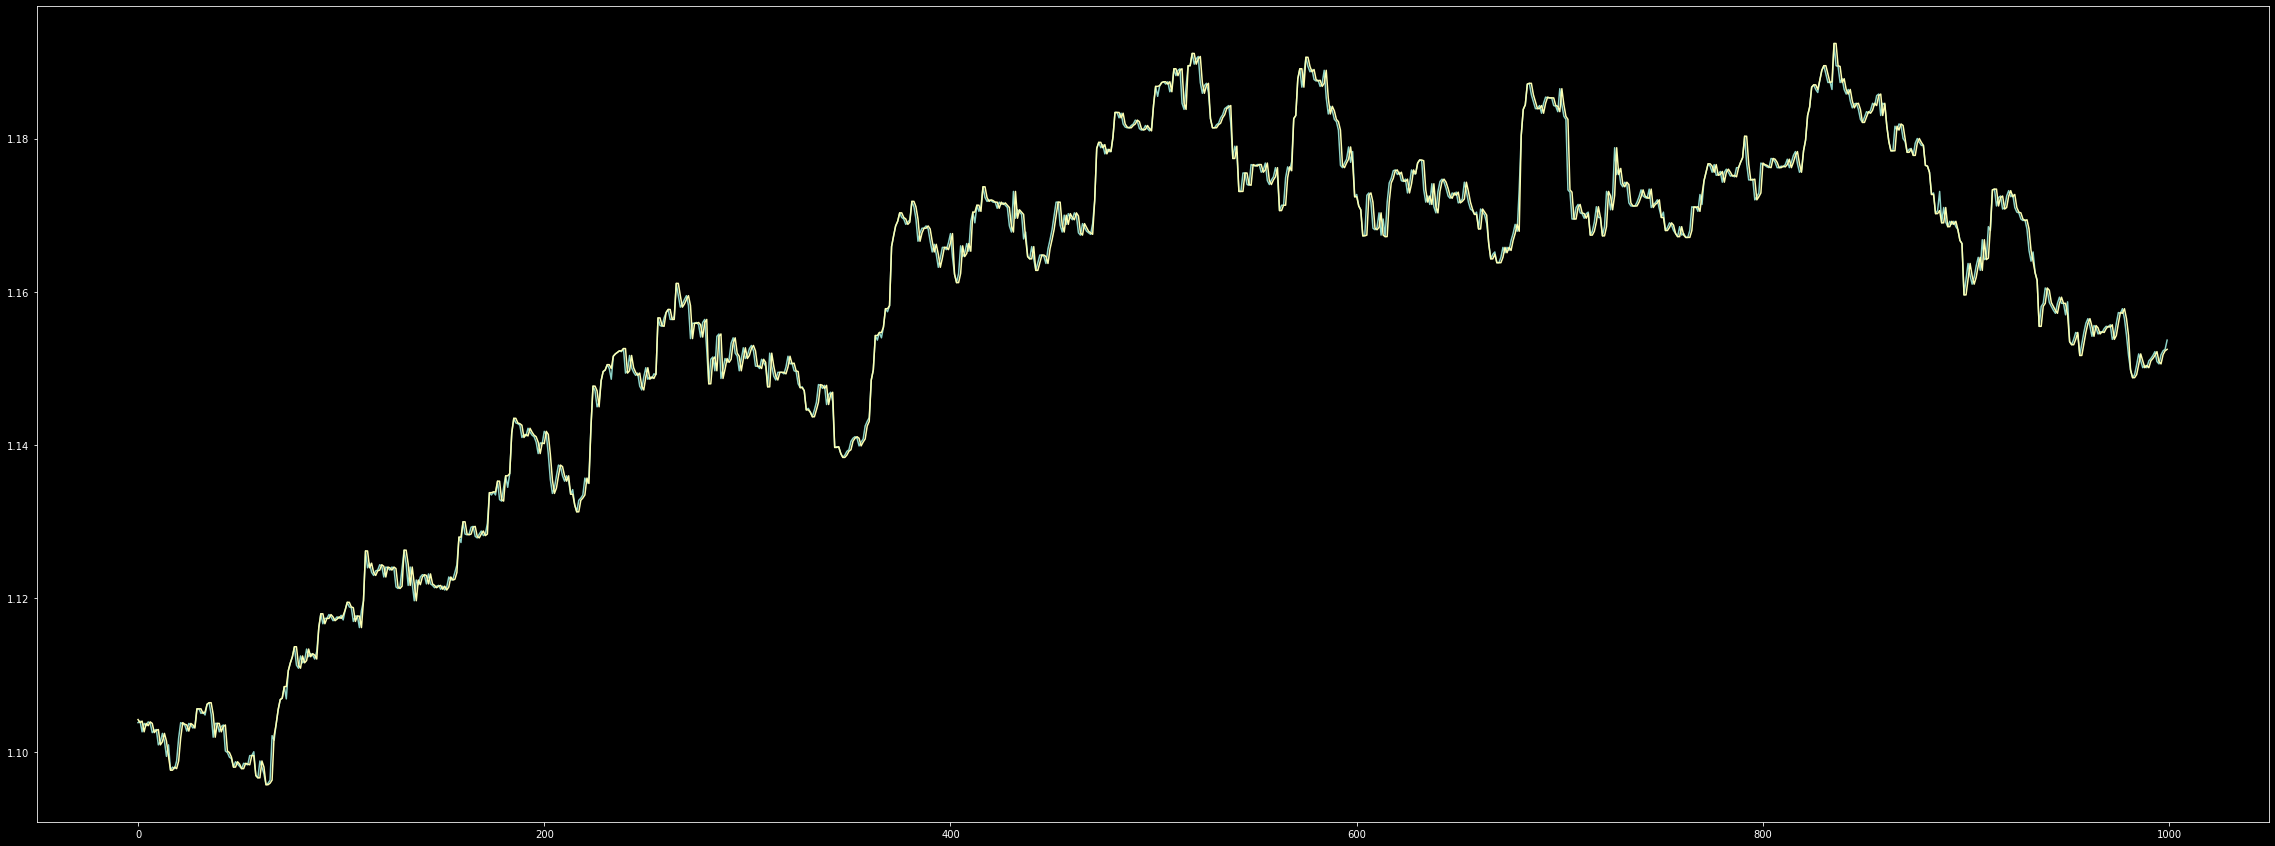

In [50]:
plt.plot(df.iloc[19000:20000].reset_index(drop=True))
#plt.plot(df.iloc[19000:20000].rolling(10).mean().reset_index(drop=True))
plt.plot(new_average[19000:20000])

In [108]:
sup = []
res = []
cut = np.mean(robot.get_normal_data()['EURUSD_High'] - robot.get_normal_data()['EURUSD_Low'])
def isFarFromLevel(levels, lista, c):
    return np.sum([abs(levels-x) < c*2  for x in lista]) == 0
for i in np.arange(2, x.size-2):
    sup_n=0
    res_n=0
    if x[i-2] > x[i-1] and x[i-1] > x[i] and x[i] < x[i+1] and x[i+1] < x[i+2]:
        if isFarFromLevel(x[i], sup, cut):
            sup.append((i, x[i]))
    elif x[i-2] < x[i-1] and x[i-1] < x[i] and x[i] > x[i+1] and x[i+1] > x[i+2]:
        if isFarFromLevel(x[i], res, cut):
            res.append((i, x[i]))

In [109]:
sup_df = pd.DataFrame()
sup_df['Index_Sup'] = np.array(sup).T[0]
sup_df['Level_Sup'] = np.array(sup).T[1]

In [111]:
sup_df

,Index_Sup,Level_Sup
0,14.0,1.00770
1,28.0,1.02340
2,40.0,1.02800
3,119.0,1.02210
4,129.0,1.02460
...,...,...
834,109034.0,1.22992
835,110354.0,1.15649
836,111812.0,1.15480
837,114247.0,1.14439


In [112]:
sup_df[(sup_df['Index_Sup'] > 19000) & (sup_df['Index_Sup'] < 20000)]

,Index_Sup,Level_Sup
266,19087.0,1.1121
267,19096.0,1.1171
268,19116.0,1.1230
269,19128.0,1.1213
270,19162.0,1.1283
271,19179.0,1.1327
272,19204.0,1.1337
273,19216.0,1.1313
274,19226.0,1.1450
275,19233.0,1.1486


In [113]:
sup[0]

(14, 1.0077)

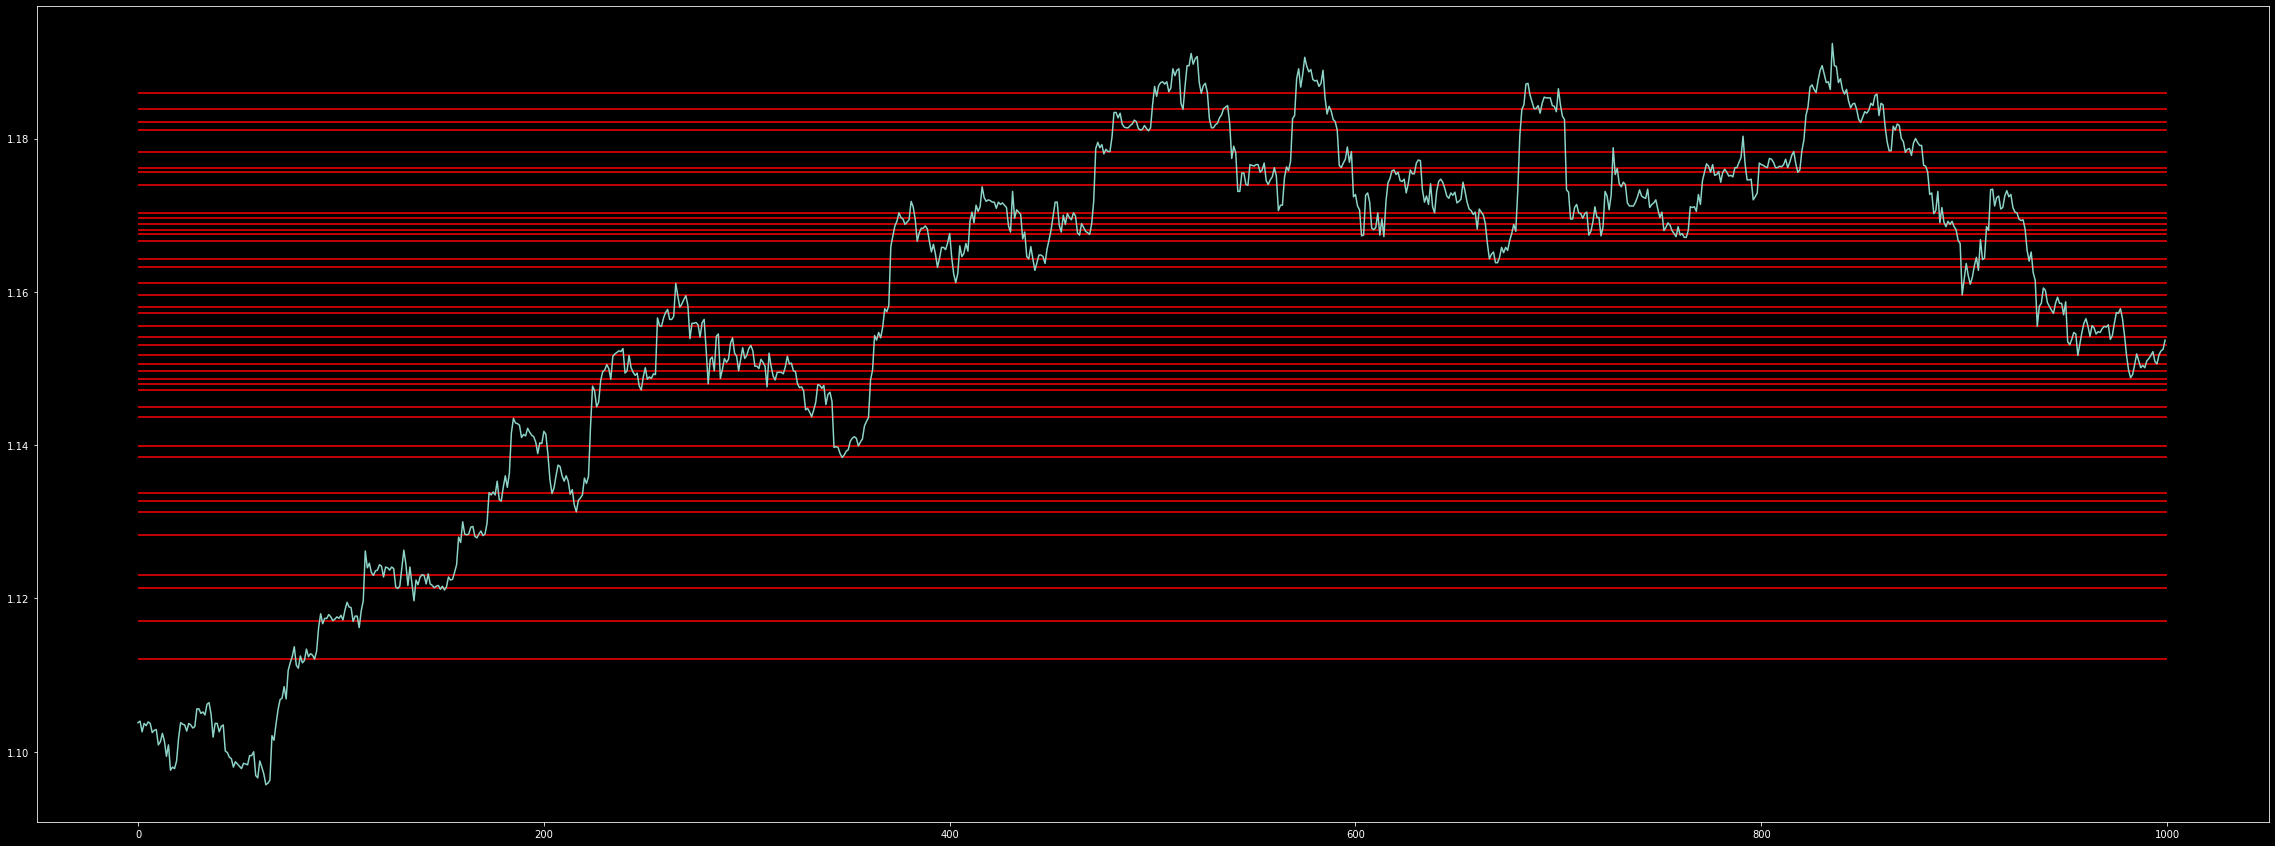

In [114]:
plt.plot(x[19000:20000])
plt.hlines(sup_df[(sup_df['Index_Sup'] > 19000) & (sup_df['Index_Sup'] < 20000)]['Level_Sup'], xmin=0., xmax=1000., color='r')

0.0002939365464330357

In [29]:
abc = [1, 2, 3, 4, 5]
i = 3
3 < 2 and 3 < 4 and 4 < 5 and 2 < 1

1.01474